In [108]:
import re
import json
import string
import nltk
import numpy as np
import pandas as pd
import seaborn as sns
# from wordcloud import WordCloud
from collections import Counter
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import  CountVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score

In [109]:
df = pd.read_json('../datasets/1_newsDataset.json')
print(df['articles'][0])

{'category': 'CRIME', 'headline': 'There Were 2 Mass Shootings In Texas Last Week, But Only 1 On TV', 'authors': 'Melissa Jeltsen', 'link': 'https://www.huffingtonpost.com/entry/texas-amanda-painter-mass-shooting_us_5b081ab4e4b0802d69caad89', 'short_description': 'She left her husband. He killed their children. Just another day in America.', 'date': '2018-05-26'}


In [110]:
pd.options.display.width = 0
pd.set_option('display.width', 5)
pd.set_option('display.max_columns', 10, 'display.width', 10, 'display.max_colwidth', 20, 'display.max_rows',100)
df = pd.read_json('../datasets/1_newsDataset.json')
df['category'] = df['articles'].apply(lambda x: x['category'])
df['headline'] = df['articles'].apply(lambda x: x['headline'])
df['authors'] = df['articles'].apply(lambda x: x['authors'])
df['link'] = df['articles'].apply(lambda x: x['link'])
df['short_description'] = df['articles'].apply(lambda x: x['short_description'])
df['date'] = df['articles'].apply(lambda x: x['date'])
data = df.drop('articles', axis=1)

print('shape:', df.shape)
pd.options.display.width = 0
pd.set_option('display.width', 5)
data.head(10)

shape: (200853, 7)


,category,headline,authors,link,short_description,date
0,CRIME,There Were 2 Mas...,Melissa Jeltsen,https://www.huff...,She left her hus...,2018-05-26
1,ENTERTAINMENT,Will Smith Joins...,Andy McDonald,https://www.huff...,Of course it has...,2018-05-26
2,ENTERTAINMENT,Hugh Grant Marri...,Ron Dicker,https://www.huff...,The actor and hi...,2018-05-26
3,ENTERTAINMENT,Jim Carrey Blast...,Ron Dicker,https://www.huff...,The actor gives ...,2018-05-26
4,ENTERTAINMENT,Julianna Marguli...,Ron Dicker,https://www.huff...,"The ""Dietland"" a...",2018-05-26
5,ENTERTAINMENT,Morgan Freeman '...,Ron Dicker,https://www.huff...,"""It is not right...",2018-05-26
6,ENTERTAINMENT,Donald Trump Is ...,Ron Dicker,https://www.huff...,"It's catchy, all...",2018-05-26
7,ENTERTAINMENT,What To Watch On...,Todd Van Luling,https://www.huff...,There's a great ...,2018-05-26
8,ENTERTAINMENT,Mike Myers Revea...,Andy McDonald,https://www.huff...,Myer's kids may ...,2018-05-26
9,ENTERTAINMENT,What To Watch On...,Todd Van Luling,https://www.huff...,You're getting a...,2018-05-26


Text(0.5, 1.0, "Distribution of articles' categories")

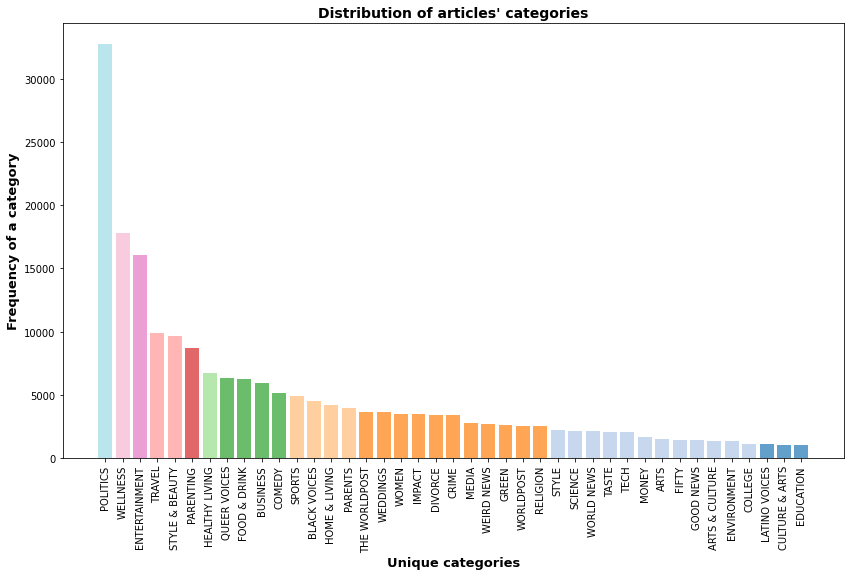

In [111]:
my_cmap = plt.get_cmap("tab20")
count = data.category.value_counts()
rescale = lambda y: ((y - np.min(y)) +  1200) / ((np.max(y) - np.min(y) -5000))
# rescale = lambda y: (y - np.min(y)) / (np.max(y) - np.min(y))

plt.figure(figsize=(14,8))
bars = plt.bar(count.index, count, color=my_cmap(rescale(list(count))), width=0.8, alpha=0.7, align='center')
plt.xticks(rotation=90)
plt.ylabel('Frequency of a category', fontdict={'fontsize':13, 'fontweight': 'bold'})
plt.xlabel('Unique categories', fontdict={'fontsize':13, 'fontweight': 'bold'})
plt.title("Distribution of articles' categories", fontdict={'fontsize':14, 'fontweight': 'bold'})

TypeError: 'DataFrame' object is not callable